<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/strock_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
#importing file
df=pd.read_csv("/content/stroke.csv")
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
#coverting objects into numarical data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.gender=le.fit_transform(df.gender)
df.ever_married=le.fit_transform(df.ever_married)
df.work_type=le.fit_transform(df.work_type)
df.Residence_type=le.fit_transform(df.Residence_type)
df.smoking_status=le.fit_transform(df.smoking_status)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
#removing unwanted columns
df1=df.drop(columns="id")
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
#missing value
df1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# using mean to fill the misssing value
mean=df1["bmi"].mean()
mean

28.893236911794666

In [ ]:
#filling the missing values by mean
df2=df1.fillna(mean)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
#confirming any missing value
df2.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#total information
df2.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smo

In [ ]:
#total rows and columns
df2.shape

(5110, 11)

In [ ]:
#spliting x and y variable
x=df2.iloc[:,:-1]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
y=df2.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
#training data testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1921,1,44.00,0,0,1,2,0,95.46,31.4,3
4074,0,70.00,0,0,1,0,0,158.33,33.5,2
2311,0,1.16,0,0,0,4,1,65.01,17.0,0
3080,0,74.00,0,0,1,2,0,83.58,18.2,2
1620,0,66.00,0,0,1,0,0,85.52,30.0,2
...,...,...,...,...,...,...,...,...,...,...
4931,0,53.00,1,0,1,0,0,98.61,38.8,3
3264,0,61.00,0,0,1,2,0,72.01,26.0,1
1653,1,44.00,0,0,1,2,0,94.71,28.4,3
2607,1,21.00,0,0,0,2,1,120.94,29.7,1


In [ ]:
y_train

1921    0
4074    0
2311    0
3080    0
1620    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 3577, dtype: int64

In [ ]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.4,3
380,1,4.0,0,0,0,4,0,106.22,16.7,0
3524,1,58.0,0,0,1,2,1,79.95,25.9,2
352,0,20.0,0,0,0,2,0,96.57,34.1,2
4927,0,10.0,0,0,0,4,0,69.84,13.7,0
...,...,...,...,...,...,...,...,...,...,...
929,1,75.0,0,1,1,3,1,207.64,30.5,1
2629,0,45.0,0,0,1,2,1,172.33,45.3,1
663,0,38.0,0,0,1,2,0,98.73,24.3,2
2303,0,75.0,0,0,1,0,0,219.39,33.4,3


In [ ]:
y_test


42      1
380     0
3524    0
352     0
4927    0
       ..
929     0
2629    0
663     0
2303    0
3122    0
Name: stroke, Length: 1533, dtype: int64

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[ 1.20137803,  0.03371052, -0.32828845, ..., -0.23646839,
         0.33380259,  1.5169448 ],
       [-0.83045611,  1.18114059, -0.32828845, ...,  1.16250964,
         0.60220965,  0.58398202],
       [-0.83045611, -1.85690117, -0.32828845, ..., -0.91403927,
        -1.50670297, -1.28194355],
       ...,
       [ 1.20137803,  0.03371052, -0.32828845, ..., -0.25315733,
        -0.04963607,  1.5169448 ],
       [ 1.20137803, -0.98132377, -0.32828845, ...,  0.33051046,
         0.11652068, -0.34898077],
       [-0.83045611,  0.65155748,  3.04610171, ..., -1.0362023 ,
         0.56386578,  0.58398202]])

In [ ]:
x_test

array([[ 1.15778151e+00,  1.72456330e+00, -3.29332461e-01, ...,
         8.38254761e-01, -3.70624050e-01,  1.51011625e+00],
       [ 1.15778151e+00, -1.74273404e+00, -3.29332461e-01, ...,
        -1.50982593e-03, -1.68365806e+00, -1.29255713e+00],
       [ 1.15778151e+00,  6.57702584e-01, -3.29332461e-01, ...,
        -5.71846322e-01, -4.38306216e-01,  5.75891791e-01],
       ...,
       [-8.63720827e-01, -2.31348016e-01, -3.29332461e-01, ...,
        -1.64121945e-01, -6.54889145e-01,  5.75891791e-01],
       [-8.63720827e-01,  1.41339559e+00, -3.29332461e-01, ...,
         2.45547462e+00,  5.76926266e-01,  1.51011625e+00],
       [-8.63720827e-01,  6.13250054e-01,  3.03644529e+00, ...,
        -9.24208764e-01,  9.01800660e-01,  1.51011625e+00]])

In [ ]:
#implimenting KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
929     0
2629    0
663     0
2303    0
3122    0
Name: stroke, Length: 1533, dtype: int64

In [ ]:
df2.shape

(5110, 11)

In [ ]:
pred=model.predict([[0,44.0,0,0,1,0,1,85.28,26.200000,0]])
pred

array([0])

In [ ]:
#predicting the model 
pred1=model.predict([[0,61.0,0,0,1,3,0,202.21,28.893237,2]])

pred1

array([0])

In [ ]:
#implimenting
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred)
result

array([[1454,    3],
       [  76,    0]])

In [ ]:
report=classification_report(y_test,y_pred)
report


'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97      1457\n           1       0.00      0.00      0.00        76\n\n    accuracy                           0.95      1533\n   macro avg       0.48      0.50      0.49      1533\nweighted avg       0.90      0.95      0.93      1533\n'

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


In [ ]:
#accuracy score
score=accuracy_score(y_test,y_pred)
score

0.9484670580560991

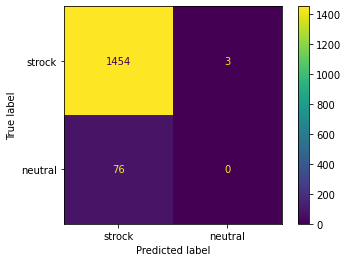

In [ ]:
#displaying confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
label=["strock","neutral"]
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()